# ✨Bienvenidos✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>

## _Antes de empezar..._

- Si tiene problemas en ejecutar su código **reinicie el kernel** _(en la barra de menú, seleccione Kernel $\rightarrow$ Restart)_.

- Asegúrese de completar cualquier lugar que diga `Tu código aquí`

- Asegúrese de colocar su nombre 






**Nombre de estudiante =** "Wilmer Escobar - Juan Delgado - Sandra Guerrero"

# Jerárquico - IRIS

este dataset incluye tres especies de flor iris con 50 muestras cada una, así como algunas propiedades de cada flor. Una especie de flor es linealmente separable de las otras dos, pero las otras dos no son linealmente separables entre sí. ¿Cúal será?

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [4]:
#SepalLengthCm  y SepalWidthCm son el largo y ancho de los sépalos del dataset Iris
datos = pd.read_csv("estudiantes_final.csv")
datos1 = pd.read_csv("estudiantes_final.csv")

In [5]:
datos.columns

Index(['Error1', 'Error2', 'Error3', 'Accepted', 'Parcial1', 'Parcial2',
       'Final', 'Tiempo', 'GanaCurso', 'Entregas'],
      dtype='object')

In [6]:
datos

,Error1,Error2,Error3,Accepted,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


/home/wilmer.escobar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


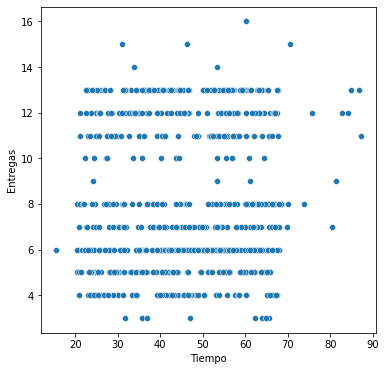

In [7]:
fig, ax = pyplot.subplots(figsize=(6, 6))
sns.scatterplot('Tiempo', 'Entregas', data = datos);
#plt.xlabel('Sepalo Largo', fontsize=18)
#plt.ylabel('Sepalo Ancho', fontsize=18)

# Selección del número óptimo de Clusters

In [8]:
#Seleccionar varibles numericas 
#iris_SP = datos[['Parcial1','Parcial2','Entregas','Tiempo']]
iris_SP = datos[['Error1', 'Error2', 'Error3', 'Accepted', 'Parcial1', 'Parcial2',
       'Final', 'Tiempo', 'GanaCurso', 'Entregas']]

In [9]:
distortions = []
K = range(1,10)
for k in K:
    modelo1 = KMeans(n_clusters=k)
    modelo1.fit(iris_SP)
    distortions.append(modelo1.inertia_)

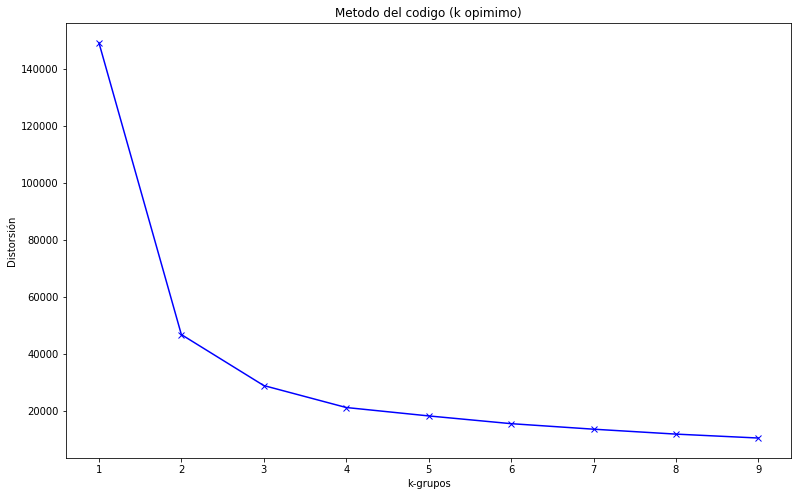

In [10]:
plt.figure(figsize=(13,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k-grupos')
plt.ylabel('Distorsión')
plt.title('Metodo del codigo (k opimimo)')
plt.show()

# Modelo Clustering K-means

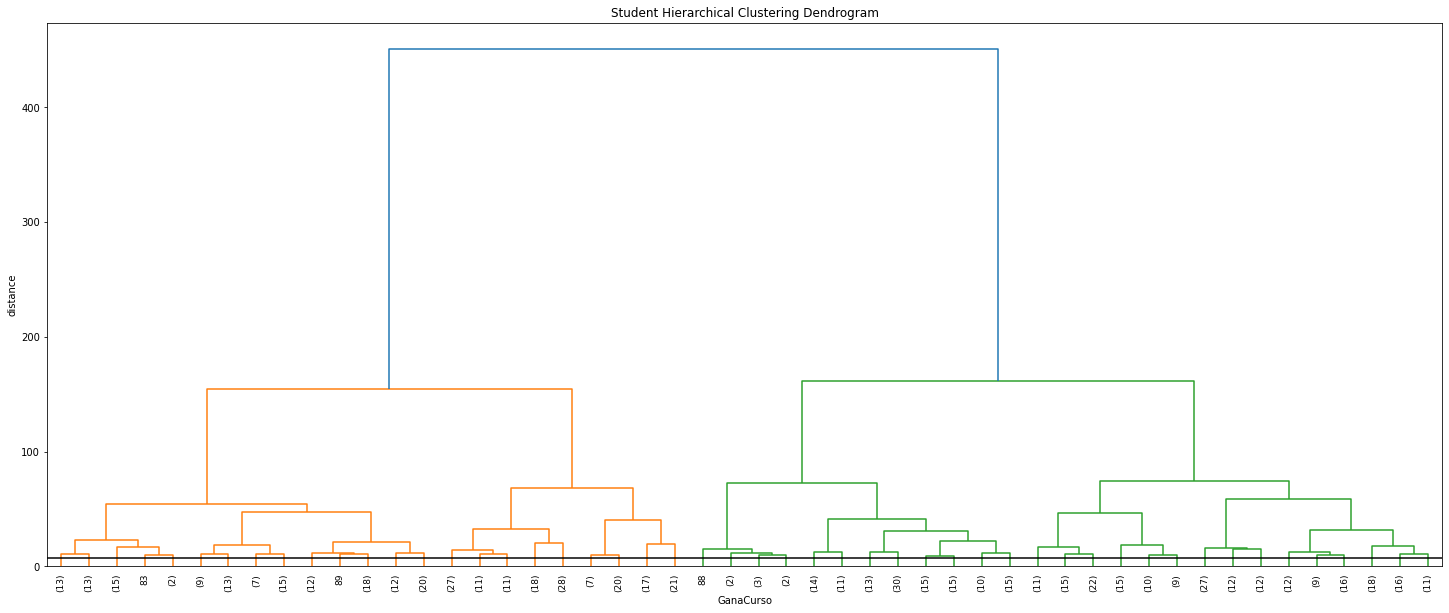

In [18]:
# calculate full dendrogram for 50
from scipy.cluster.hierarchy import fcluster, linkage

# generate the linkage matrix
distance_matrix  = linkage(iris_SP, 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Student Hierarchical Clustering Dendrogram')
plt.xlabel('GanaCurso')
plt.ylabel('distance')
'''
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
'''
from scipy.cluster.hierarchy import dendrogram
dendrogram(distance_matrix , leaf_rotation=90,p=50,truncate_mode='lastp',leaf_font_size=9.)

plt.axhline(y=max_d, c='k')
plt.show()

In [19]:
#from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
#dn = dendrogram(distance_matrix)
# Display the dendogram
#plt.show()

In [20]:
datos1

,Error1,Error2,Error3,Accepted,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas,cluster
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0,2
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0,1
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0,2
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0,2
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0,2
...,...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0,2
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0,1
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0,1
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0,1


In [21]:
#fe = preprocessing.LabelEncoder()
#datos1['Species'] = fe.fit_transform(datos1['Species']) #columna

In [22]:
# Assign cluster labels
datos1['cluster'] = fcluster(distance_matrix, 2, criterion='maxclust')

In [23]:
datos1

,Error1,Error2,Error3,Accepted,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas,cluster
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0,2
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0,1
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0,2
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0,2
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0,2
...,...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0,2
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0,1
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0,1
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0,1


/home/wilmer.escobar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/wilmer.escobar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hierarchical')

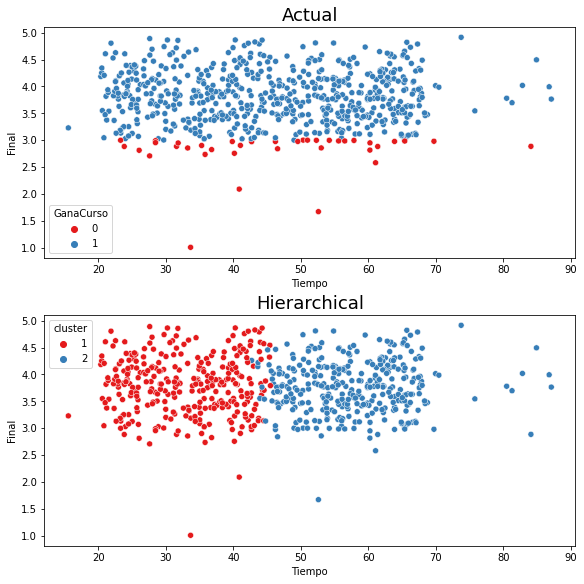

In [24]:
fig, ax = plt.subplots(2,1, figsize=(8,8), constrained_layout = True)
sns.scatterplot("Tiempo", "Final", data = datos1,  hue = "GanaCurso",  palette = "Set1", ax = ax[0]);

sns.scatterplot("Tiempo", "Final", data = datos1,  hue = "cluster", palette = "Set1", ax = ax[1]);
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('Hierarchical', fontsize=18)
